### imports and setup

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [36]:
from utils import *
from exploration import *

### load data

In [4]:
monthly_data, yearly_data = load_dataset()

### explore data

#### examine monthly data

In [5]:
monthly_data

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds
301,1995-01-01,barking and dagenham,50460,E09000002,96.0,NaN,1,1995,1,0.0,0.0
302,1995-02-01,barking and dagenham,51086,E09000002,95.0,NaN,1,1995,2,626.0,2678400.0
303,1995-03-01,barking and dagenham,51269,E09000002,144.0,NaN,1,1995,3,183.0,5097600.0
304,1995-04-01,barking and dagenham,53134,E09000002,109.0,NaN,1,1995,4,1865.0,7776000.0
305,1995-05-01,barking and dagenham,53042,E09000002,149.0,NaN,1,1995,5,-92.0,10368000.0
...,...,...,...,...,...,...,...,...,...,...,...
11438,2019-09-01,yorkshire and the humber,165362,E12000003,6567.0,NaN,0,2019,9,-342.0,778377600.0
11439,2019-10-01,yorkshire and the humber,166669,E12000003,7163.0,NaN,0,2019,10,1307.0,780969600.0
11440,2019-11-01,yorkshire and the humber,164530,E12000003,7117.0,NaN,0,2019,11,-2139.0,783648000.0
11441,2019-12-01,yorkshire and the humber,166932,E12000003,NaN,NaN,0,2019,12,2402.0,786240000.0


In [6]:
monthly_data[monthly_data.borough_flag == 0].area.unique()

array(['east midlands', 'east of england', 'england', 'inner london',
       'london', 'north east', 'north west', 'outer london', 'south east',
       'south west', 'west midlands', 'yorkshire and the humber'],
      dtype=object)

In [7]:
monthly_data[monthly_data.borough_flag == 1].area.unique()

array(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
       'camden', 'city of london', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster'], dtype=object)

In [8]:
monthly_data.date.unique()

<DatetimeArray>
['1995-01-01 00:00:00', '1995-02-01 00:00:00', '1995-03-01 00:00:00',
 '1995-04-01 00:00:00', '1995-05-01 00:00:00', '1995-06-01 00:00:00',
 '1995-07-01 00:00:00', '1995-08-01 00:00:00', '1995-09-01 00:00:00',
 '1995-10-01 00:00:00',
 ...
 '2019-04-01 00:00:00', '2019-05-01 00:00:00', '2019-06-01 00:00:00',
 '2019-07-01 00:00:00', '2019-08-01 00:00:00', '2019-09-01 00:00:00',
 '2019-10-01 00:00:00', '2019-11-01 00:00:00', '2019-12-01 00:00:00',
 '2020-01-01 00:00:00']
Length: 301, dtype: datetime64[ns]

In [9]:
monthly_data.date.unique().shape

(301,)

In [10]:
301 // 12


25

In [11]:
301 % 12

1

plot timeseries for overall price trends

In [12]:
monthly_data.date.unique()[0]

Timestamp('1995-01-01 00:00:00')

In [13]:
[
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].average_price.sum()
    for i in range(len(monthly_data.date.unique()))
]


[3382098,
 3366205,
 3361630,
 3368298,
 3400421,
 3437147,
 3470732,
 3469857,
 3447667,
 3426080,
 3415332,
 3429860,
 3420591,
 3577418,
 3446426,
 3498854,
 3512972,
 3550363,
 3571060,
 3609949,
 3624792,
 3620842,
 3646187,
 3670945,
 3730982,
 3773280,
 3817642,
 3866532,
 3942935,
 4010654,
 4090074,
 4134502,
 4199907,
 4227797,
 4283050,
 4316554,
 4364362,
 4398492,
 4441249,
 4674069,
 4547458,
 4591716,
 4641572,
 4687290,
 4705909,
 4703935,
 4691722,
 4699140,
 4724415,
 4761864,
 4816434,
 4889924,
 4965671,
 5049843,
 5138162,
 5254401,
 5398103,
 5473801,
 5579763,
 5645952,
 5744188,
 5831508,
 5926284,
 6099704,
 6201547,
 6340131,
 6439786,
 6535934,
 6580786,
 6564940,
 6655749,
 6668342,
 6702190,
 6630922,
 6683728,
 6767752,
 6887755,
 7013861,
 7131861,
 7253358,
 7303321,
 7372044,
 7469350,
 7527330,
 7549013,
 7532927,
 7588785,
 7730867,
 7913706,
 8137726,
 8336237,
 8507855,
 8637641,
 8719880,
 8841148,
 8887210,
 8987298,
 8999408,
 9048596,
 9080206,


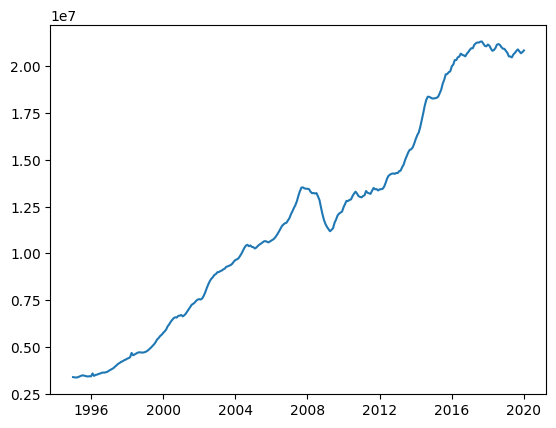

In [14]:
plt.plot(monthly_data.date.unique(), [
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].average_price.sum()
    for i in range(len(monthly_data.date.unique()))
])


/Users/Guest/math462_project/scripts/exploration.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


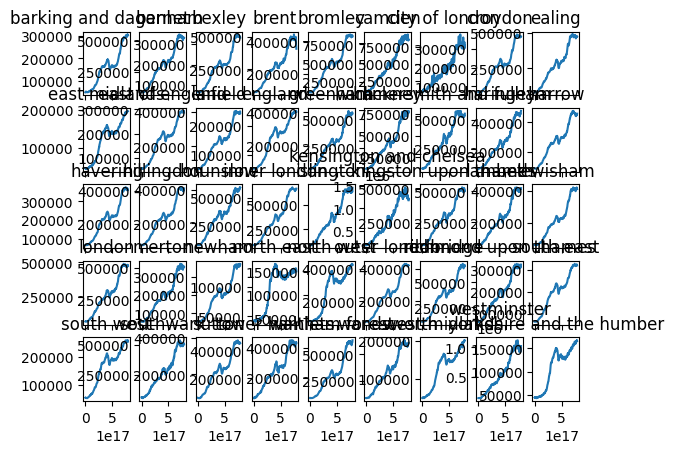

In [15]:
plot_var(monthly_data, "average_price")

visualize aggregate number of crimes committed by month

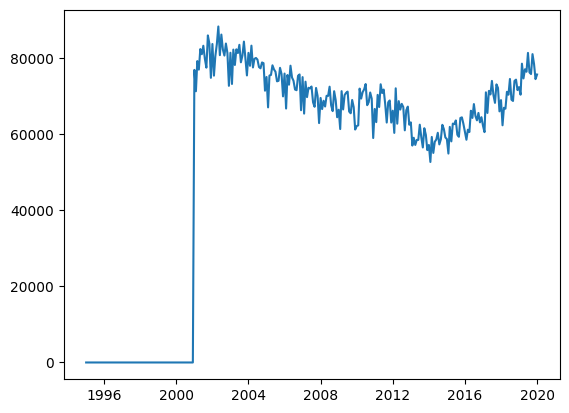

In [16]:
plt.plot(monthly_data.date.unique(), [
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].no_of_crimes.sum()
    for i in range(len(monthly_data.date.unique()))
])


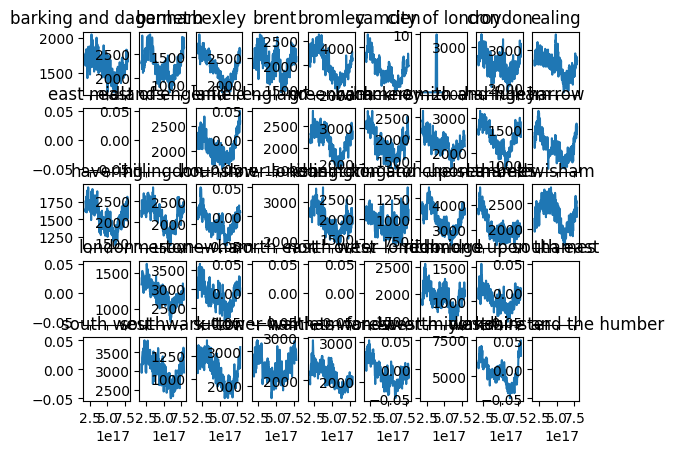

In [17]:
plot_var(monthly_data, "no_of_crimes")

#### examine yearly data

In [18]:
yearly_data

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,month,seconds
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1,1999,12,155088000.0
52,E09000002,barking and dagenham,2000-12-01,22618.0,NaN,24696,4,163893.0,57000.0,NaN,NaN,1,2000,12,186710400.0
103,E09000002,barking and dagenham,2001-12-01,22323.0,NaN,26050,3,165654.0,54000.0,3780.0,68298.0,1,2001,12,218246400.0
154,E09000002,barking and dagenham,2002-12-01,24813.0,NaN,26653,3,166357.0,52000.0,3780.0,68526.0,1,2002,12,249782400.0
205,E09000002,barking and dagenham,2003-12-01,25358.0,NaN,27792,5,166210.0,55000.0,3780.0,68837.0,1,2003,12,281318400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,E12000003,yorkshire and the humber,2015-12-01,25194.0,7.65,29371,44,5390576.0,2694000.0,NaN,NaN,0,2015,12,660009600.0
902,E12000003,yorkshire and the humber,2016-12-01,25946.0,7.69,29811,43,5425741.0,2735000.0,NaN,NaN,0,2016,12,691632000.0
953,E12000003,yorkshire and the humber,2017-12-01,26309.0,7.66,30484,42,NaN,2759000.0,NaN,NaN,0,2017,12,723168000.0
1004,E12000003,yorkshire and the humber,2018-12-01,26892.0,7.70,31719,43,NaN,2773000.0,NaN,NaN,0,2018,12,754704000.0


In [19]:
yearly_data.loc[(yearly_data.year == 2000) & (
    yearly_data.area == 'barking and dagenham')]["median_salary"].values


array([22618.])

In [20]:
monthly_data.loc[(monthly_data.year == 1995) &
                 (monthly_data.area == 'barking and dagenham'),
                 'new_col_delete'] = 10
monthly_data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds,new_col_delete
301,1995-01-01,barking and dagenham,50460,E09000002,96.0,NaN,1,1995,1,0.0,0.0,10.0
302,1995-02-01,barking and dagenham,51086,E09000002,95.0,NaN,1,1995,2,626.0,2678400.0,10.0
303,1995-03-01,barking and dagenham,51269,E09000002,144.0,NaN,1,1995,3,183.0,5097600.0,10.0
304,1995-04-01,barking and dagenham,53134,E09000002,109.0,NaN,1,1995,4,1865.0,7776000.0,10.0
305,1995-05-01,barking and dagenham,53042,E09000002,149.0,NaN,1,1995,5,-92.0,10368000.0,10.0


In [21]:
np.datetime64('1999-12-01')

numpy.datetime64('1999-12-01')

In [22]:
yearly_data.loc[yearly_data.area == 'barking and dagenham',
                ['date', 'area', 'median_salary']].groupby('area').resample(
                    'M', on='date',
                    origin='start').mean(numeric_only=True)  #.interpolate()


median_salary
area                 date                     
barking and dagenham 1999-12-31        21480.0
                     2000-01-31            NaN
                     2000-02-29            NaN
                     2000-03-31            NaN
                     2000-04-30            NaN
...                                        ...
                     2019-08-31            NaN
                     2019-09-30            NaN
                     2019-10-31            NaN
                     2019-11-30            NaN
                     2019-12-31        28738.0

[241 rows x 1 columns]

In [23]:
yearly_data.loc[yearly_data.area == 'barking and dagenham'].shape


(21, 15)

In [24]:
test_df = yearly_data[['date', 'area', 'mean_salary']].groupby('area').resample(
    'M', on='date').mean(numeric_only=True)

# test_df['mean_salary'] = test_df['mean_salary'].interpolate()
# for col in test_df.columns:
#     if col in ['year',
#        'month', 'seconds']:
#         pass
#     else:
#         test_df[col] = test_df[col].interpolate()
test_df
# .month.interpolate()

Empty DataFrame
Columns: []
Index: [(barking and dagenham, 1999-12-31 00:00:00), (barking and dagenham, 2000-01-31 00:00:00), (barking and dagenham, 2000-02-29 00:00:00), (barking and dagenham, 2000-03-31 00:00:00), (barking and dagenham, 2000-04-30 00:00:00), (barking and dagenham, 2000-05-31 00:00:00), (barking and dagenham, 2000-06-30 00:00:00), (barking and dagenham, 2000-07-31 00:00:00), (barking and dagenham, 2000-08-31 00:00:00), (barking and dagenham, 2000-09-30 00:00:00), (barking and dagenham, 2000-10-31 00:00:00), (barking and dagenham, 2000-11-30 00:00:00), (barking and dagenham, 2000-12-31 00:00:00), (barking and dagenham, 2001-01-31 00:00:00), (barking and dagenham, 2001-02-28 00:00:00), (barking and dagenham, 2001-03-31 00:00:00), (barking and dagenham, 2001-04-30 00:00:00), (barking and dagenham, 2001-05-31 00:00:00), (barking and dagenham, 2001-06-30 00:00:00), (barking and dagenham, 2001-07-31 00:00:00), (barking and dagenham, 2001-08-31 00:00:00), (barking and dagenham, 2001-09-30 00:00:00), (barking and dagenham, 2001-10-31 00:00:00), (barking and dagenham, 2001-11-30 00:00:00), (barking and dagenham, 2001-12-31 00:00:00), (barking and dagenham, 2002-01-31 00:00:00), (barking and dagenham, 2002-02-28 00:00:00), (barking and dagenham, 2002-03-31 00:00:00), (barking and dagenham, 2002-04-30 00:00:00), (barking and dagenham, 2002-05-31 00:00:00), (barking and dagenham, 2002-06-30 00:00:00), (barking and dagenham, 2002-07-31 00:00:00), (barking and dagenham, 2002-08-31 00:00:00), (barking and dagenham, 2002-09-30 00:00:00), (barking and dagenham, 2002-10-31 00:00:00), (barking and dagenham, 2002-11-30 00:00:00), (barking and dagenham, 2002-12-31 00:00:00), (barking and dagenham, 2003-01-31 00:00:00), (barking and dagenham, 2003-02-28 00:00:00), (barking and dagenham, 2003-03-31 00:00:00), (barking and dagenham, 2003-04-30 00:00:00), (barking and dagenham, 2003-05-31 00:00:00), (barking and dagenham, 2003-06-30 00:00:00), (barking and dagenham, 2003-07-31 00:00:00), (barking and dagenham, 2003-08-31 00:00:00), (barking and dagenham, 2003-09-30 00:00:00), (barking and dagenham, 2003-10-31 00:00:00), (barking and dagenham, 2003-11-30 00:00:00), (barking and dagenham, 2003-12-31 00:00:00), (barking and dagenham, 2004-01-31 00:00:00), (barking and dagenham, 2004-02-29 00:00:00), (barking and dagenham, 2004-03-31 00:00:00), (barking and dagenham, 2004-04-30 00:00:00), (barking and dagenham, 2004-05-31 00:00:00), (barking and dagenham, 2004-06-30 00:00:00), (barking and dagenham, 2004-07-31 00:00:00), (barking and dagenham, 2004-08-31 00:00:00), (barking and dagenham, 2004-09-30 00:00:00), (barking and dagenham, 2004-10-31 00:00:00), (barking and dagenham, 2004-11-30 00:00:00), (barking and dagenham, 2004-12-31 00:00:00), (barking and dagenham, 2005-01-31 00:00:00), (barking and dagenham, 2005-02-28 00:00:00), (barking and dagenham, 2005-03-31 00:00:00), (barking and dagenham, 2005-04-30 00:00:00), (barking and dagenham, 2005-05-31 00:00:00), (barking and dagenham, 2005-06-30 00:00:00), (barking and dagenham, 2005-07-31 00:00:00), (barking and dagenham, 2005-08-31 00:00:00), (barking and dagenham, 2005-09-30 00:00:00), (barking and dagenham, 2005-10-31 00:00:00), (barking and dagenham, 2005-11-30 00:00:00), (barking and dagenham, 2005-12-31 00:00:00), (barking and dagenham, 2006-01-31 00:00:00), (barking and dagenham, 2006-02-28 00:00:00), (barking and dagenham, 2006-03-31 00:00:00), (barking and dagenham, 2006-04-30 00:00:00), (barking and dagenham, 2006-05-31 00:00:00), (barking and dagenham, 2006-06-30 00:00:00), (barking and dagenham, 2006-07-31 00:00:00), (barking and dagenham, 2006-08-31 00:00:00), (barking and dagenham, 2006-09-30 00:00:00), (barking and dagenham, 2006-10-31 00:00:00), (barking and dagenham, 2006-11-30 00:00:00), (barking and dagenham, 2006-12-31 00:00:00), (barking and dagenham, 2007-01-31 00:00:00), (barking and dagenham, 2007-02-28 00:00:00), (barking and dagenham, 2007-03-31 00:00:00), (bar

In [25]:
monthly_resampled = clean_load_dataset(
    '../dataset/housing_in_london_yearly_variables_resampled.csv')

/Users/Guest/math462_project/scripts/utils.py:115: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


In [26]:
monthly_data[(monthly_data.area == 'barking and dagenham')
             & (monthly_data.year >= 2000) & (monthly_data.year <= 2003)]


,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds,new_col_delete
361,2000-01-01,barking and dagenham,71079,E09000002,182.0,NaN,1,2000,1,2267.0,157766400.0,NaN
362,2000-02-01,barking and dagenham,72633,E09000002,191.0,NaN,1,2000,2,1554.0,160444800.0,NaN
363,2000-03-01,barking and dagenham,73624,E09000002,216.0,NaN,1,2000,3,991.0,162950400.0,NaN
364,2000-04-01,barking and dagenham,73800,E09000002,214.0,NaN,1,2000,4,176.0,165628800.0,NaN
365,2000-05-01,barking and dagenham,75126,E09000002,240.0,NaN,1,2000,5,1326.0,168220800.0,NaN
366,2000-06-01,barking and dagenham,76939,E09000002,294.0,NaN,1,2000,6,1813.0,170899200.0,NaN
367,2000-07-01,barking and dagenham,78869,E09000002,305.0,NaN,1,2000,7,1930.0,173491200.0,NaN
368,2000-08-01,barking and dagenham,80150,E09000002,240.0,NaN,1,2000,8,1281.0,176169600.0,NaN
369,2000-09-01,barking and dagenham,81761,E09000002,223.0,NaN,1,2000,9,1611.0,178848000.0,NaN
370,2000-10-01,barking and dagenham,82501,E09000002,196.0,NaN,1,2000,10,740.0,181440000.0,NaN


In [27]:
monthly_resampled[(monthly_resampled.area == 'barking and dagenham')
                  & (monthly_resampled.year >= 2000) &
                  (monthly_resampled.year <= 2003)].shape
# monthly_resampled[monthly_resampled.area == 'barking and dagenham']

(48, 12)

### integrate yearly data into monthly dataset

In [28]:
yearly_resampled = clean_load_dataset(
    "../dataset/housing_in_london_yearly_variables_resampled.csv")
yearly_resampled

/Users/Guest/math462_project/scripts/utils.py:115: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


,Unnamed: 0,area,date,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,month
0,0,barking and dagenham,1999-12-31,21480.00000,NaN,162444.00,NaN,NaN,NaN,1,1999,12
1,1,barking and dagenham,2000-01-31,21574.83333,NaN,162564.75,NaN,NaN,NaN,1,2000,1
2,2,barking and dagenham,2000-02-29,21669.66667,NaN,162685.50,NaN,NaN,NaN,1,2000,2
3,3,barking and dagenham,2000-03-31,21764.50000,NaN,162806.25,NaN,NaN,NaN,1,2000,3
4,4,barking and dagenham,2000-04-30,21859.33333,NaN,162927.00,NaN,NaN,NaN,1,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
12286,12286,yorkshire and the humber,2019-08-31,27520.66667,7.7,5425741.00,2773000.0,2203.0,124509.0,0,2019,8
12287,12287,yorkshire and the humber,2019-09-30,27599.25000,7.7,5425741.00,2773000.0,2203.0,124509.0,0,2019,9
12288,12288,yorkshire and the humber,2019-10-31,27677.83333,7.7,5425741.00,2773000.0,2203.0,124509.0,0,2019,10
12289,12289,yorkshire and the humber,2019-11-30,27756.41667,7.7,5425741.00,2773000.0,2203.0,124509.0,0,2019,11


In [29]:
df = monthly_data.copy()
for col in [
        'median_salary', 'life_satisfaction', 'population_size',
        'number_of_jobs', 'area_size', 'no_of_houses'
]:
    df = interpolate_yearly(df, yearly_resampled, col=col)

In [30]:
df[df.year >= 2002]

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds,new_col_delete,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses
385,2002-01-01,barking and dagenham,98713,E09000002,216.0,1751.0,1,2002,1,2001.0,220924800.0,NaN,22530.50000,NaN,1.657126e+05,5.383333e+04,3780.0,68317.0
386,2002-02-01,barking and dagenham,100229,E09000002,198.0,1529.0,1,2002,2,1516.0,223603200.0,NaN,22738.00000,NaN,1.657712e+05,5.366667e+04,3780.0,68336.0
387,2002-03-01,barking and dagenham,101633,E09000002,261.0,1626.0,1,2002,3,1404.0,226022400.0,NaN,22945.50000,NaN,1.658298e+05,5.350000e+04,3780.0,68355.0
388,2002-04-01,barking and dagenham,103885,E09000002,285.0,1685.0,1,2002,4,2252.0,228700800.0,NaN,23153.00000,NaN,1.658883e+05,5.333333e+04,3780.0,68374.0
389,2002-05-01,barking and dagenham,105761,E09000002,335.0,1872.0,1,2002,5,1876.0,231292800.0,NaN,23360.50000,NaN,1.659469e+05,5.316667e+04,3780.0,68393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11438,2019-09-01,yorkshire and the humber,165362,E12000003,6567.0,NaN,0,2019,9,-342.0,778377600.0,NaN,27599.25000,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0
11439,2019-10-01,yorkshire and the humber,166669,E12000003,7163.0,NaN,0,2019,10,1307.0,780969600.0,NaN,27677.83333,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0
11440,2019-11-01,yorkshire and the humber,164530,E12000003,7117.0,NaN,0,2019,11,-2139.0,783648000.0,NaN,27756.41667,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0
11441,2019-12-01,yorkshire and the humber,166932,E12000003,NaN,NaN,0,2019,12,2402.0,786240000.0,NaN,27835.00000,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0


### check utils function

In [31]:
monthly_data = load_interpolated_data()

/Users/Guest/math462_project/scripts/utils.py:115: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


In [32]:
# for col in [
#         'median_salary', 'population_size', 'number_of_jobs', 'area_size',
#         'no_of_houses'
# ]:
#     monthly_data[col] = monthly_data[col].astype(int, errors='ignore')
monthly_data[monthly_data.year >= 2002]

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year,month,average_price_d1,seconds,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses
385,2002-01-01,barking and dagenham,98713,E09000002,216.0,1751.0,1,2002,1,2001.0,220924800.0,22530.50000,NaN,1.657126e+05,5.383333e+04,3780.0,68317.0
386,2002-02-01,barking and dagenham,100229,E09000002,198.0,1529.0,1,2002,2,1516.0,223603200.0,22738.00000,NaN,1.657712e+05,5.366667e+04,3780.0,68336.0
387,2002-03-01,barking and dagenham,101633,E09000002,261.0,1626.0,1,2002,3,1404.0,226022400.0,22945.50000,NaN,1.658298e+05,5.350000e+04,3780.0,68355.0
388,2002-04-01,barking and dagenham,103885,E09000002,285.0,1685.0,1,2002,4,2252.0,228700800.0,23153.00000,NaN,1.658883e+05,5.333333e+04,3780.0,68374.0
389,2002-05-01,barking and dagenham,105761,E09000002,335.0,1872.0,1,2002,5,1876.0,231292800.0,23360.50000,NaN,1.659469e+05,5.316667e+04,3780.0,68393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11438,2019-09-01,yorkshire and the humber,165362,E12000003,6567.0,NaN,0,2019,9,-342.0,778377600.0,27599.25000,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0
11439,2019-10-01,yorkshire and the humber,166669,E12000003,7163.0,NaN,0,2019,10,1307.0,780969600.0,27677.83333,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0
11440,2019-11-01,yorkshire and the humber,164530,E12000003,7117.0,NaN,0,2019,11,-2139.0,783648000.0,27756.41667,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0
11441,2019-12-01,yorkshire and the humber,166932,E12000003,NaN,NaN,0,2019,12,2402.0,786240000.0,27835.00000,7.7,5.425741e+06,2.773000e+06,2203.0,124509.0


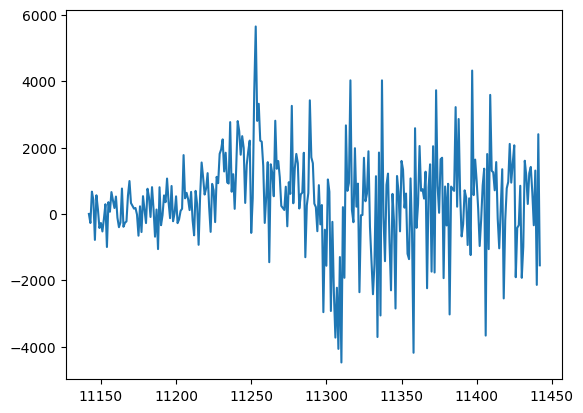

In [33]:
# plot deltas between each data point
a = 'yorkshire and the humber'
plt.plot(monthly_data.loc[monthly_data.area==a, 'average_price_d1'])

In [34]:
# check autocorrelation

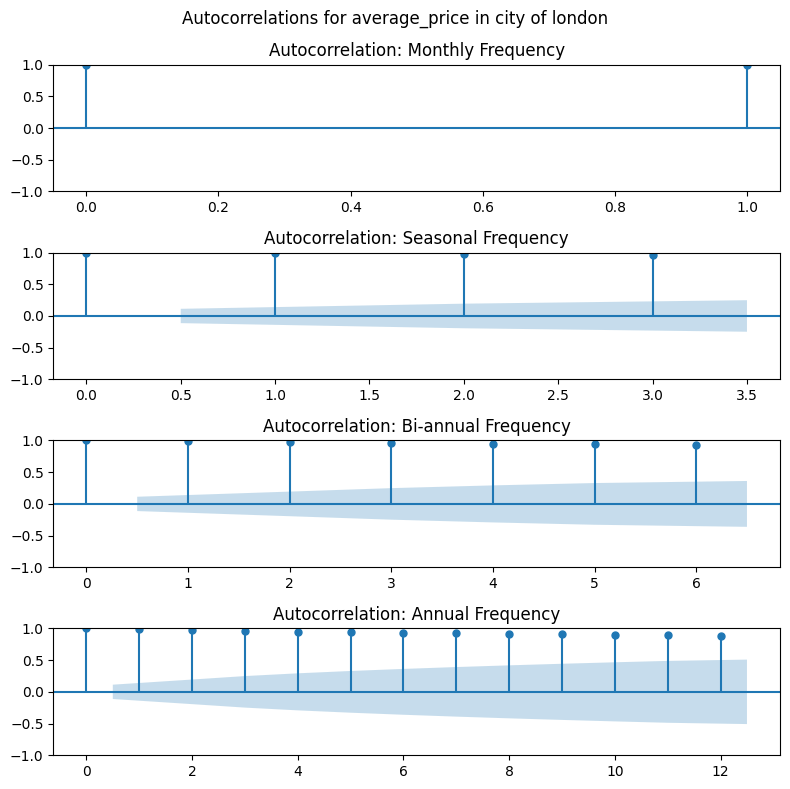

In [48]:
lags = [
    1, # monthly
    3, # seasonally
    6, # bi-annually
    12 # annually
]
# lags = [3 * samples_per_hour, samples_per_day, samples_per_week]
titles= ['Autocorrelation: Monthly Frequency',
         'Autocorrelation: Seasonal Frequency',
         'Autocorrelation: Bi-annual Frequency',
         'Autocorrelation: Annual Frequency']

area = "city of london"
col = 'average_price'
suptitle = f'Autocorrelations for {col} in {area}'
plot_multi_acf(get_area(monthly_data, area)[col], lags, titles, suptitle)


so we see that there is a lot of autocorrelation within our data. let's see what the autocorrelation looks like for our differenced data.

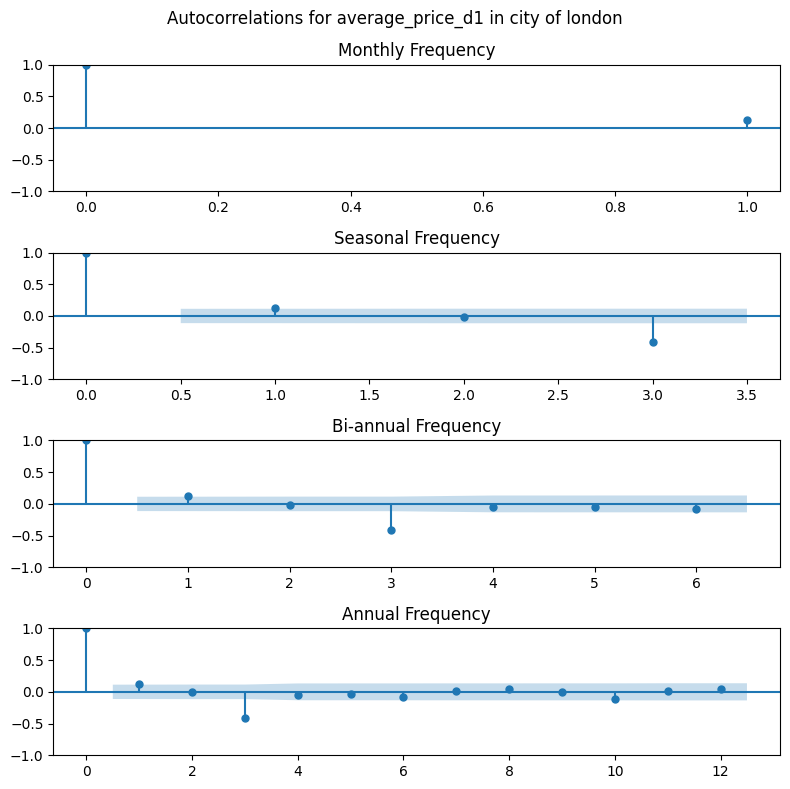

In [49]:
lags = [
    1, # monthly
    3, # seasonally
    6, # bi-annually
    12 # annually
]
# lags = [3 * samples_per_hour, samples_per_day, samples_per_week]
titles= ['Monthly Frequency',
         'Seasonal Frequency',
         'Bi-annual Frequency',
         'Annual Frequency']

area = "city of london"
col = 'average_price_d1'
suptitle = f'Autocorrelations for {col} in {area}'
plot_multi_acf(get_area(monthly_data, area)[col], lags, titles, suptitle)


ok, the autocorrelation isn't quite 0, but its a lot smaller now, which is better. 